<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Práctica 2: Greedy</h2>
</center>
</p>
</div>

<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un minimum spanning tree de ese grafo es un subgrafo que tiene que ser un árbol y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso proporcional entre ellos, que es un número representativo de algún objeto, distancia, etc.; y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o un árbol expandido mínimo es un árbol recubridor que pesa menos o igual que otros árboles recubridores. Todo grafo tiene un bosque recubridor mínimo.
  </p>
  <p>
      En esta práctica se plantea la implementación del algoritmo de Prim para encontrar el arbol de expansión mínima en el metro de Londres.
  </p>
  </div>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: El grafo del metro de londres.</li>
</ul>
<br>
<h3>OUTPUT</h3>

<ul>
<li>
__tree__: Objeto de tipo `Graph` que contenga el MST del grafo inical.
</li>
<ul>

</p>
</div>


In [329]:
from util import get_subway_graph, draw_subway_graph
from graph import Graph
import random
G, lines = get_subway_graph('csv', Graph)


def prim(G, origin=None):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (Graph): El grafo de tipo Graph sobre el que queremos buscar los componentes conexos
    Returns:
        tree: El grafo de tipo Graph que contiene el arbol de expansión mínima.
    """
    """Se crea lista para agregar los nodos visitados para asi no repetirlos cuando veamos los vecinos, una lista de pendientes
    donde cogeremos de ella el que tenga la distancia , una copia del la cantidad de nodos y el arbol que retornaremos al 
    final del programa. """
    
    visited = []
    pending = []   
    _num_nodes = len(G)
    tree = Graph()

    
    """Inicializamos todos los nodos a None excepto el primero que sera 0 y añadimos un atributo para saber cual es el nodo 
    previo. En este caso añadimos nodos al arbol (aunque no hace falta ya que al añadir las aristas esto ya se hace) para poder
    mostrar en el test la diferencia que hay en el metro de londres. Tambien añadimos sus atributos para poder dibujarlo.
    """
    
    for i in G.nodes():
        G.node[i].update({'dist_actual': None})
        G.node[i].update({'node_prev': None})
        tree.add_node(i,G.node[i])
    G.node[origin]['dist_actual'] = 0  
    
    
    """Sabemos que un arbol tiene un total de aristas de nº de vertices - 1 por lo que iteraremos v-1 veces i a cada iteracion
    se agregara una arista """
    while _num_nodes > 0:

        """Se miran los vecinos del nodo actual i en caso de que este no este visitado o no este en la lista de pendientes se 
        agregara en esta."""
        for i in G.neighbors(origin):
            if i not in pending and i not in visited:
                pending.append(i)


        """Como los nodos estan inicializados a None si al mirar los nodos esta el None actualizaremos la distancia con respecto
        al nodo que estamos mirando y marcaremos desde donde viene. En caso de que ya tengan una distancia asociada miraremos 
        si la distancia que estamos mirando es mas pequeña que la ya establecida por el nodo, si lo es se modificara la distancia
        y el nodo previo."""
        for i in G.edge[origin]:
            if G.node[i]['dist_actual'] == None:
                G.node[i]['dist_actual'] = G.edge[origin][i]['distance']
                G.node[i]['node_prev'] = origin
            
            else:
                if G.node[i]['dist_actual'] > G.edge[origin][i]['distance']:
                    G.node[i]['dist_actual'] = G.edge[origin][i]['distance']
                    G.node[i]['node_prev'] = origin


        """El nodo actual se agregara en la lista de visitados."""
        visited.append(origin)
        
        """Para poder elegir el nodo con la distancia minima lo que hacemos es crear una lista con los nodos que estan pendientes
        y que ya no esten visitados. En nuestro caso se escogera siempre el primero pero lo podemos hacer para que escoja uno
        aleatorio. Actualizaremos distancia y origen por que si da la casualidad de que hemos escogido el nodo que tiene asocia
        da la minima distancia en el for no se realizara cambios. En caso de que no sea asi se miraran todos las distancias 
        asociadas en los nodos que se encuentren en la nueva lista creada y se actualizara el origen para la siguiente iteracion."""       
        
        dist_rand = [a for a in pending if a not in visited]
        if (len(dist_rand) != 0):
            node = dist_rand[0]
            dist = G.node[node]['dist_actual']
            origin = node
        
            for i in dist_rand:          
                if G.node[i]['dist_actual'] < dist:
                    dist = G.node[i]['dist_actual'] 
                    origin = i

        """Como el nodo que estamos mirando es el que tiene distancia minima de los que estamos mirando agregamos la arista de 
        este y del nodo previo al que viene. Al agregar la lista se añade los atributos que ya tenia pero esto es para poder
        mostrar la diferencia que habia en el primer grafo de metros y en el segundo (arbol)."""
        tree.add_edge(G.node[origin]['node_prev'],origin,G.edge[G.node[origin]['node_prev']][origin])   
        
        """Decrementamos uno en señal de que se ha agregado una arista"""
        _num_nodes -= 1
    
    """Retornamos el arbol"""
    return tree
    

In [330]:
nd = G.nodes()
origin = random.choice(nd)
prim(G, origin)

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>

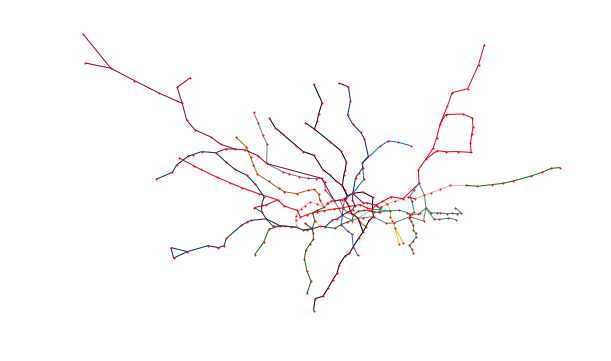

nº de nodos =  306 
nº de aristas =  353


In [331]:
draw_subway_graph(G, lines, figsize=(10,6))
print ("nº de nodos = ",len((G).nodes()),"\nnº de aristas = ",len((G).edges()))

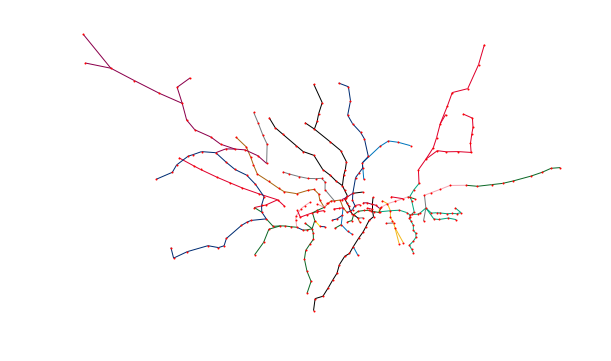

nº de nodos =  306 
nº de aristas =  305


In [332]:
draw_subway_graph(prim(G, origin), lines, figsize=(10,6),show_labels=False)
print ("nº de nodos = ",len(prim(G, origin).nodes()),"\nnº de aristas = ",len(tree.edges()))

<div class="alert alert-info">
<center>
  <h1>Comentarios</h1>
  <p>
  En esta sección tenéis que comentar brevemente (1) __cómo habéis realizado la implementación del algoritmo__ así como un (2) __análisis detallado de la complejidad__ del mismo.
  </p>
</center>
</div>

El algoritmo lo hemos implemetado con dos listas una para guardar los nodos ya visitados y otra para guardar los pendientes. Tambien hemos usado dos objetos de tipo grafo. El primero tiene los datos de la linea de londres y el segundo esta vacio y es donde se añadiran las aristas para conseguir el MST.
La complexidad del algoritmo es de O(n^3) debido a que hay un while, dentro de este hay un for y dentro de este hay un if que usa el "in" que lo que hace es mirar si elemento esta en la lista pero lo hace de uno en uno es como si fuera otro for.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
  <p>
  La entrega de esta práctica se realizará a través del __Campus Virtual__. En ella tenéis que incluir únicamente el fichero `.ipynb` sin comprimir con el código debidamente comentado y los comentarios que se os proponen en la anterior sección.
  </p>
  <p>
  El nombre del archivo ha de seguir el formato:
  </p><p style="text-align:center">
  ```
  <apellidos>_<nombre>_EP1.ipynb
  ```
  </p>
</center>
</div>